# Лабораторная работа №1 по глубокому обучению
## Устинов Александр, 3824М1ПМвм

## **Постановка задачи**

Обучить нейронную сеть для решения задачи классификации цифр из датасета MNIST. Сеть должна состоять из входного слоя с 784 нейронами, скрытого слоя с $s$ нейронами и выходного слоя с 10 нейронами. Входной слой связан со скрытым с помощью полносвязного слоя, за которым следует функция активации ReLU. Скрытый слой связан с выходным с помощью полносвязного слоя и функции softmax.

Требуется добиться точности не менее 95% на тестовой выборке с контрольными параметрами:
- Размер пачки данных: от 8 до 64 изображений (в зависимости от доступного объема памяти);
- Скорость обучения: 0.1;
- Количество скрытых нейронов $s$: 300;
- Количество эпох: 20.

## **Метод обратного распространения ошибки**

Любая нейронная сеть является функцией специального вида, зависящей от значений на входном слое, а также параметров, называемых *весами*. Обучение нейронной сети обычно представляет собой решение задачи оптимизации для целевой функции, основанной на значениях на выходном слое нейронной сети. Целью решения задачи оптимизации является получение весов, максимизирующих или минимизирующих целевую функцию, если входом для нейронной сети выступает некоторый известный набор данных, называемый *тренировочной выборкой*. Предполагается, что полученные таким образом веса будут обеспечивать достаточно хорошие значения метрик качества нейронных сетей.

Нейронные сети, показывающие хорошие результаты в реальных задачах, являются достаточно сложно устроенными функциями из-за архитектуры сети и большого количества параметров. Поэтому аналитические методы решения задач оптимизации для них оказываются неприменимы. Вместо этого используются численные методы, в частности - градиентные методы. Их особенность заключается в том, что обновление весов, которые можно представить в виде вектора в многомерном пространстве, производится на основе градиента целевой функции. Градиентные методы строят последовательность точек в многомерном пространстве, которая должна сходиться к некоторому локальному минимуму целевой функции. Пусть $L$ - целевая функция, $w$ - вектор весов. Для метода задаются начальные значения весов $w_0$, а последующие значения определяются согласно формуле:

$$w_{k+1} = w_{k} - \eta_k \frac{\partial L}{\partial w}(w_k),$$
где $\eta_k > 0$ - масштабирующий коэффициент, называемый *скоростью обучения* (*learning rate*) и зависящий, вообще говоря, от номера шага. При выполнении данной работы learning rate будет считаться постоянным.

Существуют различные подходы к вычислению градиента на одном шаге численного метода. Градиент может вычисляться основе всей выборки - это случай *градиентного спуска*. Такой подход является вычислительно затратным, поэтому он не используется на практике, когда размер тренировочной выборки велик. *Стохастический градиентный спуск* предполагает использование всего одного элемента тренировочной выборки, выбранного случайно. Вычислений на шаге становится значительно меньше, однако ухудшается скорость сходимости метода. Компромиссом между первым и вторым подходами является *мини-пакетный стохастический градиентный спуск* (*mini-batched SGD*), в котором на одном шаге используются нескольких элементов тренировочной выборки, по ним усредняются значения целевой функции и градиента. Данный метод обеспечивает более устойчивую сходимость к локальному минимуму и обладает хорошей производительностью за счёт использования матричных операций. Благодаря этим преимуществам метод чаще всего используется на практике.



*Метод обратного распространения ошибки* является методом обновления параметров нейронной сети при использовании градиентных методов локальной оптимизации. Он определяет способ вычисления частных производных $L$ по весам.

Метод состоит из *прямого прохода*, на котором вычисляются значения на отдельных слоях нейронной сети, и *обратного прохода*, на котором вычисляются значения частных производных $L$ по различным переменным - как по весам, так и по промежуточным переменным. Обратный проход использует подход, называемый *автоматическим дифференцированием*. Он предполагает вывод (на основе правил дифференцирования) формул для производных функции, в которых участвуют уже вычисленные значения функций или других производных. Поскольку граф вычислений нейронной сети является ациклическим, возможно обеспечить корректный порядок вычисления производных по полученным формулам.

# **Вывод формул**

Используемая в лабораторной работе нейронная есть имеет следующую архитектуру:

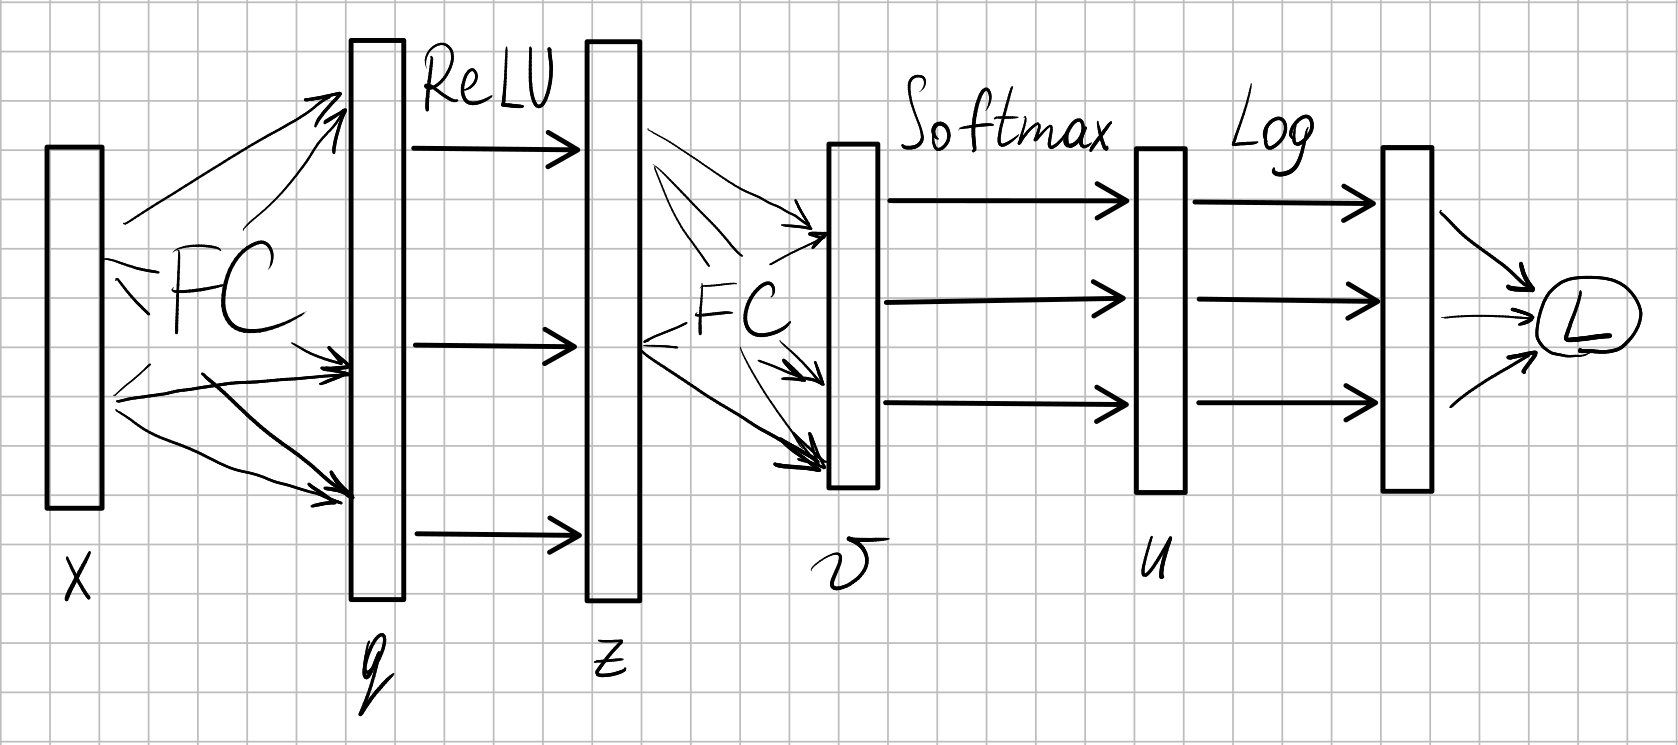

Входной слой обозначен $x$, переменные на скрытом слое обозначены $q$ и $z$, на выходном слое - $v$ и $u$.

Запишем формулы для данных переменных:
$$q = W^{(x)}x + b^{(x)} \in \mathbb{R}^{s}$$
$$z = ReLU(q) \in \mathbb{R}^{s}$$
$$v = W^{(z)}z + b^{(z)} \in \mathbb{R}^{10}$$
$$u = Softmax(v) \in \mathbb{R}^{10},$$
где $W^{(x)} \in \mathbb{R}^{784 \times s}$, $b^{(x)} \in \mathbb{R}^{s}$, $W^{(z)} \in \mathbb{R}^{s \times 10}$, $b^{(z)} \in \mathbb{R}^{10}$ - матрицы и векторы весов,\
$ReLU(t) = \max\{0, t\}$,\
$u_k = \dfrac{e^{v_k}}{\sum_{i=1}^{10}e^{v_i}} \;(k = \overline{1,10})$.


Предположим, что при обучении сети на вход подаётся одно изображение $x$, имеющее класс $c$. Тогда кросс-энтропия на выходе сети имеет вид:
$$L = -\sum_{i=1}^{10}y_i\ln{u_i},$$
где $y = (y_1, y_2, ..., y_{10})^T$ - вектор, у которого компонента $c$ равна единице, а остальные компоненты равны нулю.

Вычислим частные производные $L$ по всем весам:

1.

$$\frac{\partial L}{\partial v_k} = -\sum_{i=1}^{10}y_i \frac{\partial(\ln{u_i})}{\partial v_k} = -\sum_{i=1}^{10}y_i \left(\frac{\partial v_i}{\partial v_k} - \frac{\partial\left(\ln\left(\sum_{j=1}^{10}e^{v_j}\right)\right)}{\partial v_k}\right) = -\sum_{i=1}^{10}y_i \left(\delta_{ik} - \frac{e^{v_k}}{\sum_{j=1}^{10}e^{v_j}}\right) = -\sum_{i=1}^{10}y_i \left(\delta_{ik} - u_k\right) = u_k - y_k$$
с учётом того, что сумма всех $y_i$ равна 1 по определению выше.

Тогда $$\frac{\partial L}{\partial v} = u - y.$$

2.

$$\frac{\partial L}{\partial z_k} = \sum_{l=1}^{10}\frac{\partial L}{\partial v_l}\frac{\partial v_l}{\partial z_k} = \sum_{l=1}^{10}\frac{\partial L}{\partial v_l}W^{(z)}_{lk},$$
поскольку $v_l$ соответствует умножению $l$-й строки $W^{(z)}$ на $z$, а $k$-й элемент строки соответствует переменной $z_k$; отсюда следует, что

$$\frac{\partial L}{\partial z} = \left(W^{(z)}_{lk}\right)^{T} \frac{\partial L}{\partial v}.$$

3.

$$\frac{\partial L}{\partial W^{(z)}_{ij}} = \sum_{l=1}^{10}\frac{\partial L}{\partial v_l}\frac{\partial v_l}{\partial W^{(z)}_{ij}} = \frac{\partial L}{\partial v_i}\frac{\partial v_i}{\partial W^{(z)}_{ij}} = \frac{\partial L}{\partial v_i}z_j,$$
поскольку $W^{(z)}_{ij}$ явно входит только в выражение для $v_i$, причём находится только в множителе $W^{(z)}_{ij} z_j$; аналогично
$$\frac{\partial L}{\partial b^{(z)}_{i}} = \sum_{l=1}^{10}\frac{\partial L}{\partial v_l}\frac{\partial v_l}{\partial b^{(z)}_{i}} = \frac{\partial L}{\partial v_i}\frac{\partial v_i}{\partial b^{(z)}_{i}} = \frac{\partial L}{\partial v_i};$$

поэтому

$$\frac{\partial L}{\partial W^{(z)}} = \frac{\partial L}{\partial v} z^T,\;\; \frac{\partial L}{\partial b^{(z)}} = \frac{\partial L}{\partial v}.$$

4.

$$\frac{\partial z_i}{\partial q_i} = \theta(q_i),$$
где $\theta(t) = \begin{cases}1, t \geq 0 \\ 0, t < 0\end{cases}$ - функция Хевисайда;


$$\frac{\partial L}{\partial W^{(x)}_{ij}} = \sum_{l=1}^{s}\frac{\partial L}{\partial q_l}\frac{\partial q_l}{W^{(x)}_{ij}} = \sum_{l=1}^{s}\frac{\partial L}{\partial z_l}\frac{\partial z_l}{\partial q_l}\frac{\partial q_l}{W^{(x)}_{ij}} = \frac{\partial L}{\partial z_i}\theta(q_i)\frac{\partial q_i}{W^{(x)}_{ij}} = \frac{\partial L}{\partial z_i}\theta(q_i)x_j,$$
$$\frac{\partial L}{\partial b^{(x)}_{i}} = \frac{\partial L}{\partial z_i}\theta(q_i);$$

следовательно,

$$\frac{\partial L}{\partial W^{(x)}} = \left(\frac{\partial L}{\partial z} \odot \theta(q)\right) x^T,\;\; \frac{\partial L}{\partial b^{(x)}} = \frac{\partial L}{\partial z} \odot \theta(q),$$

где $\odot$ - поэлементное произведение векторов.

При подаче на вход $K$ изображений функция потерь определяется как среднее по одиночным кросс-энтропиям:
$$L = -\frac{1}{K}\sum_{m=1}^{K}\sum_{i=1}^{10}y_i^{(m)}\ln{u_i^{(m)}},$$
поэтому в формуле для $\dfrac{\partial L}{\partial v_k}$ появится суммирование с делением на $K$.\
Итого выведены все формулы для вычисления частных производных в методе обратного распространения ошибки.

# **Реализация на Python**

Импортируем необходимые библиотеки:

In [1]:
%pip install idx2numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import idx2numpy

# set seed for reproducibility
np.random.seed(19937)

Приведём реализацию класса нейронной сети на Python с интерфейсом, аналогичным фреймворку PyTorch:

In [3]:
class NeuralNetwork:
    def __init__(self, input_dim, s, output_dim, learning_rate=0.1):
        self.input_dim = input_dim   # input layer dimension
        self.s = s                   # hidden layer dimension
        self.output_dim = output_dim # output layer dimension
        self.learning_rate = learning_rate

        # Initialize weights with normal distribution with mean 0
        # and variance depending on the number of layer inputs
        self.Wx = np.random.normal(0, (2 / self.input_dim)**0.5, size=(self.input_dim, self.s))
        self.bx = np.random.normal(0, (2 / self.input_dim)**0.5, size=(self.s))
        self.Wz = np.random.normal(0, (2 / self.s)**0.5, size=(self.s, self.output_dim))
        self.bz = np.random.normal(0, (2 / self.s)**0.5, size=(self.output_dim))

        # Declare intermediate function values
        self.x = None # shape = (batch_size, input_dim)
        self.q = None # shape = (batch_size, s)
        self.z = None # shape = (batch_size, s)
        self.v = None # shape = (batch_size, output_dim)
        self.u = None # shape = (batch_size, output_dim)

        # Declare partial derivatives of L
        self.dL_dv  = None # shape = (batch_size, output_dim)
        self.dL_dz  = None # shape = (batch_size, s)
        self.dL_dWz = None # shape = (s, output_dim)
        self.dL_dbz = None # shape = (output_dim)
        self.dL_dWx = None # shape = (input_dim, s)
        self.dL_dbx = None # shape = (s)

        # print("self.Wx.shape:", self.Wx.shape)
        # print("self.bx.shape:", self.bx.shape)
        # print("self.Wz.shape:", self.Wz.shape)
        # print("self.bz.shape:", self.bz.shape)

        # print("Wx:", self.Wx)
        # print("bx:", self.bx)
        # print("Wz:", self.Wz)
        # print("bz:", self.bz)

    def forward(self, x):
        self.x = x
        self.q = np.dot(x, self.Wx) + self.bx
        self.z = np.maximum(self.q, 0)
        self.v = np.dot(self.z, self.Wz) + self.bz
        self.u = np.exp(self.v - np.max(self.v, axis=1, keepdims=True))
        self.u = self.u / np.sum(self.u, axis=1, keepdims=True)

        # print("self.x.shape:", self.x.shape)
        # print("self.q.shape:", self.q.shape)
        # print("self.z.shape:", self.z.shape)
        # print("self.v.shape:", self.v.shape)
        # print("self.u.shape:", self.u.shape)

        # print("x:", self.x)
        # print("q:", self.q)
        # print("z:", self.z)
        # print("v:", self.v)
        # print("u:", self.u)

        return self.u

    # Backward step of backpropagation - compute derivatives
    # y - batch of targets (0-9)
    def backward(self, y):
        batch_size = y.shape[0]
        # dL/dv = mean(u - y)
        # self.dL_dv.shape = (batch_size, output_dim)
        self.dL_dv = self.u.copy()
        self.dL_dv[np.arange(batch_size), y] -= 1
        self.dL_dv /= batch_size
        # print("self.dL_dv.shape:", self.dL_dv.shape)

        # dL/dz = Wz^T * dL/dv
        # self.Wz.shape = (s, output_dim)
        # self.dL_dv.shape = (batch_size, output_dim)
        # self.dL_dz.shape = (batch_size, s)
        self.dL_dz = np.dot(self.dL_dv, self.Wz.T)
        # print("self.dL_dz.shape:", self.dL_dz.shape)

        # dL/dWz = dL/dv * z^T
        # self.z.shape = (batch_size, s)
        # self.dL_dv.shape = (batch_size, output_dim)
        # self.dL_dWz.shape = (s, output_dim)
        self.dL_dWz = np.dot(self.z.T, self.dL_dv)
        # print("self.dL_dWz.shape:", self.dL_dWz.shape)

        # dL/dbz = dL/dv
        self.dL_dbz = np.sum(self.dL_dv, axis=0)
        # print("self.dL_dbz.shape:", self.dL_dbz.shape)

        # tmp.shape = (batch_size, s)
        tmp = self.dL_dz * (self.q > 0)

        # dL/dbx = dL/dz .* theta(q)
        self.dL_dbx = np.sum(tmp, axis=0)
        # print("self.dL_dbx.shape:", self.dL_dbx.shape)

        # dL/dWx = (dL/dz .* theta(q)) * x^T
        # tmp.shape = (batch_size, s)
        # self.x.shape = (batch_size, input_dim)
        # self.dL_dWx.shape = (input_dim, s)
        self.dL_dWx = np.dot(self.x.T, tmp)
        # print("self.dL_dWx.shape:", self.dL_dWx.shape)

    def step(self):
        self.Wx -= self.dL_dWx * self.learning_rate
        self.bx -= self.dL_dbx * self.learning_rate
        self.Wz -= self.dL_dWz * self.learning_rate
        self.bz -= self.dL_dbz * self.learning_rate

    def loss(self, p, y):
        batch_size = y.shape[0]
        return -np.mean(np.log(p[np.arange(batch_size), y] + 1e-13))

Методы `forward()` и `backward()` предполагают работу с наборами из нескольких элементов выборок. Поэтому умножение матриц в них несколько не соответствует выведенным формулам, но правильно учитывает размерность `batch_size` и приводит к правильным размерностям градиентов весов.

Проверим, что в вычислениях все размерности матриц совместны, на следующем примере:


In [4]:
# example parameters
input_dim = 4
hidden_dim = 3
output_dim = 2
batch_size = 8

# generate random batches
batch_x = np.random.rand(batch_size, input_dim)
batch_y = np.random.randint(0, output_dim - 1, size=batch_size)

# create network, perform forward/backward pass and compute loss
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
p = model.forward(batch_x)
model.backward(batch_y)
loss = model.loss(p, batch_y)

# check forward() result dimension
assert p.shape == (8, 2)

print("probabilities:", p)
print("loss:", loss)

probabilities: [[0.69642574 0.30357426]
 [0.76694761 0.23305239]
 [0.74849027 0.25150973]
 [0.69657178 0.30342822]
 [0.74221893 0.25778107]
 [0.82764923 0.17235077]
 [0.69132381 0.30867619]
 [0.76149006 0.23850994]]
loss: 0.3009142985982347


Загрузим датасет MNIST и убедимся, что данные имеют требуемую размерность, а метки соответствуют нарисованным цифрам:

In [5]:
path = kagglehub.dataset_download("hojjatk/mnist-dataset")
print("Path to MNIST dataset:", path)

Using Colab cache for faster access to the 'mnist-dataset' dataset.
Path to MNIST dataset: /kaggle/input/mnist-dataset


In [6]:
x_train_raw = idx2numpy.convert_from_file('/kaggle/input/mnist-dataset/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('/kaggle/input/mnist-dataset/train-labels.idx1-ubyte')
x_test_raw  = idx2numpy.convert_from_file('/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte')
y_test  = idx2numpy.convert_from_file('/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte')

print(x_train_raw.shape)
print(y_train.shape)
print(x_test_raw.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


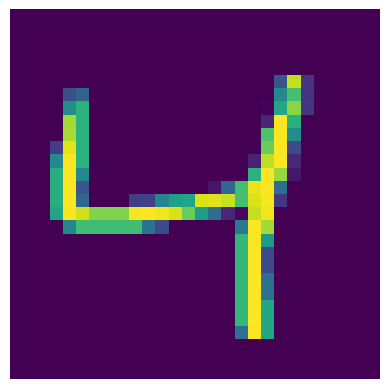

4


In [7]:
plt.imshow(x_train_raw[2])
plt.axis('off')
plt.show()
print(y_train[2])

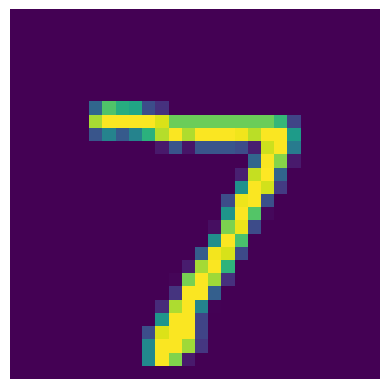

7


In [8]:
plt.imshow(x_test_raw[0])
plt.axis('off')
plt.show()
print(y_test[0])

"Выпрямим" картинки размера 28x28 в один вектор размера 784, а также выполним нормализацию: поделим значения векторов на 255 (максимальную интенсивность пикселей), чтобы они оказались в отрезке $[0; 1]$:

In [9]:
x_train = x_train_raw.reshape((60000, 784))
x_test  = x_test_raw.reshape((10000, 784))

x_train = x_train / 255.0
x_test = x_test / 255.0

Теперь определим функцию, которая обучает нейронную сеть для решения задачи классификации на датасете MNIST с контрольным набором параметров:

In [10]:
input_dim = 28 * 28
hidden_dim = 300
output_dim = 10

In [11]:
import time
import tqdm

def trainNetwork(x_train, y_train, x_test, y_test, epoch_count=20, batch_size=100):
    x_train_copy = x_train.copy()
    y_train_copy = y_train.copy()
    train_size = x_train_copy.shape[0]

    model = NeuralNetwork(input_dim, hidden_dim, output_dim)

    for epoch in range(epoch_count):

        time_start = time.time()

        # shuffle x_train_copy and y_train_copy
        shuffle_idx = np.arange(train_size)
        np.random.shuffle(shuffle_idx)
        x_train_copy = x_train_copy[shuffle_idx]
        y_train_copy = y_train_copy[shuffle_idx]

        # iterate over batches
        for i in tqdm.tqdm(range(0, train_size, batch_size)):
            x_batch = x_train_copy[i : i + batch_size]
            y_batch = y_train_copy[i : i + batch_size]

            p = model.forward(x_batch)
            model.backward(y_batch)
            model.step()

        time_end = time.time()

        # run network on test dataset and compute loss and accuracy
        y_test_p = model.forward(x_test)
        y_test_predict = np.argmax(y_test_p, axis=1)
        loss = model.loss(y_test_p, y_test)
        accuracy = np.mean(y_test_predict == y_test)

        print(f'epoch: {epoch + 1}')
        print(f'time: {time_end - time_start}')
        print(f'loss: {loss}')
        print(f'accuracy: {accuracy}')



In [12]:
trained_network = trainNetwork(x_train, y_train, x_test, y_test)

100%|██████████| 600/600 [00:08<00:00, 66.78it/s] 


epoch: 1
time: 9.701858043670654
loss: 0.24321887729962377
accuracy: 0.9293


100%|██████████| 600/600 [00:06<00:00, 86.96it/s] 


epoch: 2
time: 7.096290826797485
loss: 0.1868048374018034
accuracy: 0.9458


100%|██████████| 600/600 [00:04<00:00, 123.96it/s]


epoch: 3
time: 5.024429082870483
loss: 0.15528996480325646
accuracy: 0.9541


100%|██████████| 600/600 [00:06<00:00, 89.71it/s] 


epoch: 4
time: 6.850749492645264
loss: 0.13311385733029757
accuracy: 0.9604


100%|██████████| 600/600 [00:04<00:00, 139.69it/s]


epoch: 5
time: 4.457403659820557
loss: 0.11690714181985397
accuracy: 0.9656


100%|██████████| 600/600 [00:11<00:00, 53.89it/s]


epoch: 6
time: 11.308459758758545
loss: 0.1050811030195769
accuracy: 0.9668


100%|██████████| 600/600 [00:06<00:00, 96.63it/s] 


epoch: 7
time: 6.654795408248901
loss: 0.09897835983199625
accuracy: 0.9708


100%|██████████| 600/600 [00:05<00:00, 116.63it/s]


epoch: 8
time: 5.563014984130859
loss: 0.09097194895494592
accuracy: 0.9736


100%|██████████| 600/600 [00:04<00:00, 130.99it/s]


epoch: 9
time: 5.268033027648926
loss: 0.08775814801929892
accuracy: 0.9737


100%|██████████| 600/600 [00:03<00:00, 152.81it/s]


epoch: 10
time: 4.154642343521118
loss: 0.08559519001841108
accuracy: 0.9744


100%|██████████| 600/600 [00:06<00:00, 93.75it/s] 


epoch: 11
time: 6.607432842254639
loss: 0.08078692739959384
accuracy: 0.9768


100%|██████████| 600/600 [00:03<00:00, 161.74it/s]


epoch: 12
time: 3.938486337661743
loss: 0.0765680370047922
accuracy: 0.9765


100%|██████████| 600/600 [00:04<00:00, 149.45it/s]


epoch: 13
time: 4.1737096309661865
loss: 0.07704406407847109
accuracy: 0.9759


100%|██████████| 600/600 [00:06<00:00, 86.54it/s] 


epoch: 14
time: 7.117227792739868
loss: 0.07192115619144557
accuracy: 0.9778


100%|██████████| 600/600 [00:03<00:00, 155.07it/s]


epoch: 15
time: 4.053383111953735
loss: 0.07068194235166797
accuracy: 0.9789


100%|██████████| 600/600 [00:06<00:00, 93.24it/s]


epoch: 16
time: 6.6277570724487305
loss: 0.07024281016924525
accuracy: 0.9785


100%|██████████| 600/600 [00:03<00:00, 150.89it/s]


epoch: 17
time: 4.12472939491272
loss: 0.06994990901117021
accuracy: 0.9791


100%|██████████| 600/600 [00:03<00:00, 150.56it/s]


epoch: 18
time: 4.1681318283081055
loss: 0.06720355641090384
accuracy: 0.9794


100%|██████████| 600/600 [00:06<00:00, 94.45it/s] 


epoch: 19
time: 6.502121925354004
loss: 0.06658928005986259
accuracy: 0.9796


100%|██████████| 600/600 [00:04<00:00, 144.98it/s]


epoch: 20
time: 4.28740668296814
loss: 0.0668696160940067
accuracy: 0.9802


В результате обучения удалось добиться точности 98% на тестовой выборке.